# Problem: 
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
Task: Based on this data you are required to build features and model on these characteristics of users to categorize users based on their transactions . Your model will be evaluated on these criteria: -
a. Feature Engineering (Variable Imputation)

b. Model Selection Criteria (Basis of choosing the final Technique)

c. Measurement Criteria (Comparison of Various Models)

d. Scope for improvement

we will be covering what is RFM and how we can use these factors to segment the customers and target our marketing campaigns based on these RFM values

### What is RFM?
RFM is a method used to analyze customer value. RFM stands for RECENCY, Frequency, and Monetary.

RECENCY: How recently did the customer visit our website or how recently did a customer purchase?

Frequency: How often do they visit or how often do they purchase?

Monetary: How much revenue we get from their visit or how much do they spend when they purchase?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import matplotlib.mlab as mlab
import datetime
import scipy
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
print('Import libraries sucessfully !!')

Import libraries sucessfully !!


In [2]:
df=pd.read_csv('OnlineRetail.csv',encoding= 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:

#df=df.drop_duplicates()
#df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
#df['StockCode'].value_counts()

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
# Checking missing Value
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
import missingno as msno

<AxesSubplot:>

<Figure size 1440x360 with 0 Axes>

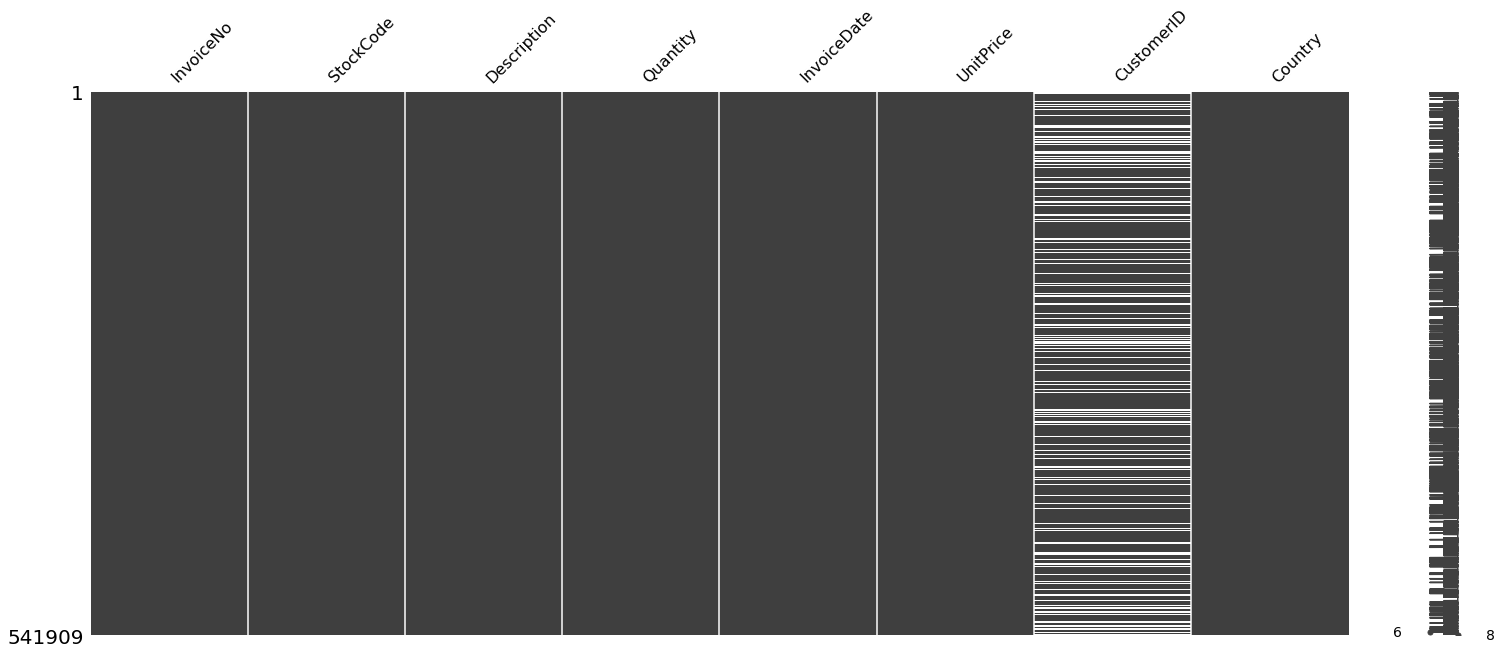

In [11]:
plt.figure(figsize=(20,5))
msno.matrix(df)

<AxesSubplot:>

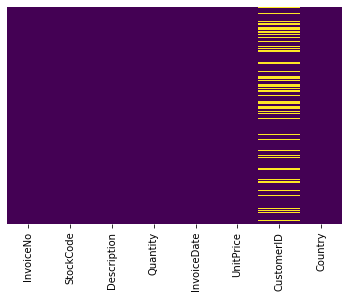

In [12]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [13]:
print("Percentage of customers missing: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )

Percentage of customers missing:  24.93 %


In [14]:
# dropping NaN
#df.dropna(inplace=True)

In [15]:
#df['Amount']=df['Quantity']*df['UnitPrice']
#df.head()

<AxesSubplot:>

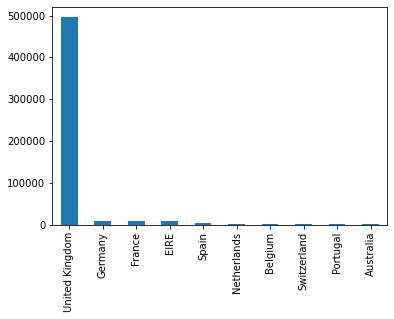

In [16]:
df['Country'].value_counts()[:10].plot.bar()

In [17]:
df.Country.value_counts().reset_index().head(20)

,index,Country
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


The unique customers of the retailer having customer ID and their percentage of orders by top 10 orders.

In [18]:
df.CustomerID.unique().shape

(4373,)

In [19]:
(df.CustomerID.value_counts()/sum(df.CustomerID.value_counts())*100).head(13).cumsum()

17841.0    1.962249
14911.0    3.413228
14096.0    4.673708
12748.0    5.814728
14606.0    6.498553
15311.0    7.110850
14646.0    7.623350
13089.0    8.079807
13263.0    8.492020
14298.0    8.895138
15039.0    9.265809
14156.0    9.614850
18118.0    9.930462
Name: CustomerID, dtype: float64

Out of 4373 unique customers only 13 were ordered the 10% of the total sales of retailer based on cumulative sum.

In [20]:
df.StockCode.unique().shape

(4070,)

In [21]:
df.Description.unique().shape

(4224,)

From the above, we observed that there is a mismatch between StockCode and Description and also number of Descriptions more than the Stock code values,which means that we have multiple descriptions for some of the Stockcodes.

In [22]:
df_des=df.groupby(['Description','StockCode']).count().reset_index()
df_des.StockCode.value_counts()[df.StockCode.value_counts()>1].reset_index().head()

,index,StockCode
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,21181,5


In [23]:
df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [24]:
df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

The output of the two attributes having negitive values,which means that may have some return transactions in this data.

## Data preprocessing

Separate data for one geography

In [25]:
df=df[df.Country=='United Kingdom']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [26]:
df.Country.value_counts()

United Kingdom    495478
Name: Country, dtype: int64

Separate attribute based on amount

In [27]:
df['Amount']=df.Quantity*df.UnitPrice
df['Amount'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Amount, dtype: float64

In [28]:
df.Amount.unique()

array([ 15.3 ,  20.34,  22.  , ...,  25.08, 469.44,  66.36])

In [29]:
df=df[~(df['Amount']<0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Remove transactions having missing values for the Customer ID field

In [30]:
df=df[~(df.CustomerID.isnull())]
print(df.shape)
df.head()

(354345, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Create the RFM model (Recency, Frequency,Monetary value)

To create a Recency feature variable, we need to decide the reference date for analysis and we wil define the reference date as one day before the last transaction.

In [31]:
reference_date=df.InvoiceDate.max()
reference_date=reference_date+datetime.timedelta(days=1)#timedelta function returns to total number of seconds
print(df.InvoiceDate.max(),df.InvoiceDate.min())
reference_date

2011-12-09 12:49:00 2010-12-01 08:26:00


Timestamp('2011-12-10 12:49:00')

We will construct a reference variable as number of days before the reference date when a customer last made a purchase.

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [33]:
df['days_since_last_purchase']=reference_date-df.InvoiceDate
df['days_since_last_purchase_num']=df['days_since_last_purchase'].astype('timedelta64[D]')
df['days_since_last_purchase_num'].head()  

0    374.0
1    374.0
2    374.0
3    374.0
4    374.0
Name: days_since_last_purchase_num, dtype: float64

Customer history of last transactions

In [34]:
customer_history_df=df.groupby('CustomerID').min().reset_index()[['CustomerID', 'days_since_last_purchase_num']]
customer_history_df.rename(columns={'days_since_last_purchase_num':'Recency'}, inplace=True)
print(customer_history_df.describe())
customer_history_df.head()

         CustomerID      Recency
count   3921.000000  3921.000000
mean   15561.471563    92.188472
std     1576.823683    99.528995
min    12346.000000     1.000000
25%    14208.000000    18.000000
50%    15569.000000    51.000000
75%    16913.000000   143.000000
max    18287.000000   374.000000


,CustomerID,Recency
0,12346.0,326.0
1,12747.0,2.0
2,12748.0,1.0
3,12749.0,4.0
4,12820.0,3.0


Distribution of customer recency

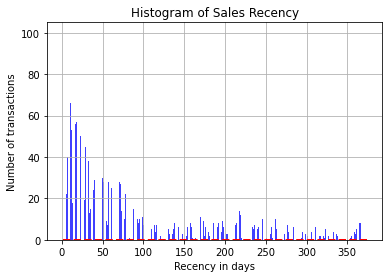

In [35]:
x=customer_history_df.Recency
mu=np.mean(x)
sigma=math.sqrt(np.var(x))
n,bins,patches=plt.hist(x,1000,facecolor='blue',alpha=0.75)#alpha=transparency parameter
# Add a best fit line
y=scipy.stats.norm.pdf(bins,mu,sigma)#norm.pdf-probability density function for norm
l=plt.plot(bins,y,'r--',lw=2)

plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title('Histogram of Sales Recency')
plt.grid(True)
plt.show()

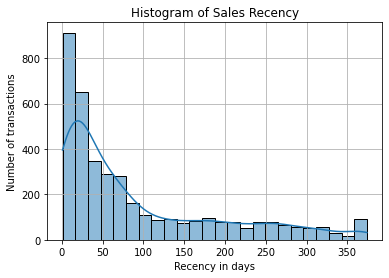

In [36]:
sns.histplot(customer_history_df.Recency,kde=True)
plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title('Histogram of Sales Recency')
plt.grid(True)
plt.show()

In [37]:
customer_monetary_val=df[['CustomerID','Amount']].groupby('CustomerID').sum().reset_index()
customer_history_df=customer_history_df.merge(customer_monetary_val,how='outer')
customer_history_df.Amount=customer_history_df.Amount+0.001
customer_freq=df[['CustomerID','Amount']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns={'Amount':'Frequency'},inplace=True)
customer_history_df=customer_history_df.merge(customer_freq,how='outer')

customer_history_df=pd.DataFrame(customer_history_df,columns=['CustomerID','Recency','Amount','Frequency'])
customer_history_df.head()

,CustomerID,Recency,Amount,Frequency
0,12346.0,326.0,77183.601,1
1,12747.0,2.0,4196.011,103
2,12748.0,1.0,33719.731,4596
3,12749.0,4.0,4090.881,199
4,12820.0,3.0,942.341,59


In [38]:
customer_history_df.isnull().sum()


CustomerID    0
Recency       0
Amount        0
Frequency     0
dtype: int64

In [39]:
customer_history_df.shape

(3921, 4)

In [40]:
customer_history_df.Recency.value_counts()

4.0      100
1.0       87
3.0       84
2.0       74
8.0       67
        ... 
351.0      1
168.0      1
245.0      1
102.0      1
258.0      1
Name: Recency, Length: 348, dtype: int64

In [41]:
customer_history_df.dropna(inplace=True)

In [42]:
customer_history_df.shape

(3921, 4)

In [43]:
customer_history_df

,CustomerID,Recency,Amount,Frequency
0,12346.0,326.0,77183.601,1
1,12747.0,2.0,4196.011,103
2,12748.0,1.0,33719.731,4596
3,12749.0,4.0,4090.881,199
4,12820.0,3.0,942.341,59
...,...,...,...,...
3916,18280.0,278.0,180.601,10
3917,18281.0,181.0,80.821,7
3918,18282.0,8.0,178.051,12
3919,18283.0,4.0,2094.881,756


In [47]:
df=customer_history_df.set_index('CustomerID')
df

,Recency,Amount,Frequency
CustomerID,,,
12346.0,326.0,77183.601,1
12747.0,2.0,4196.011,103
12748.0,1.0,33719.731,4596
12749.0,4.0,4090.881,199
12820.0,3.0,942.341,59
...,...,...,...
18280.0,278.0,180.601,10
18281.0,181.0,80.821,7
18282.0,8.0,178.051,12


## K_means_clustering

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_features= scaler.transform(df)
X = pd.DataFrame(scaled_features,columns=df.columns)
X.head()


,Recency,Amount,Frequency
0,2.349480,10.068174,-0.410395
1,-0.906268,0.311738,0.057992
2,-0.916317,4.258248,20.690005
3,-0.886171,0.297685,0.498828
4,-0.896220,-0.123189,-0.144057


In [61]:
from sklearn.cluster import KMeans
wcss  = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

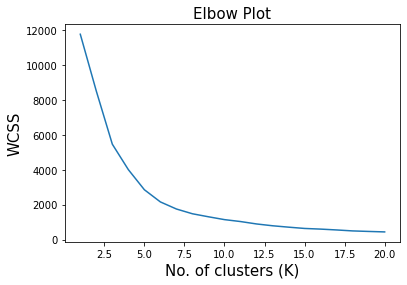

In [62]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

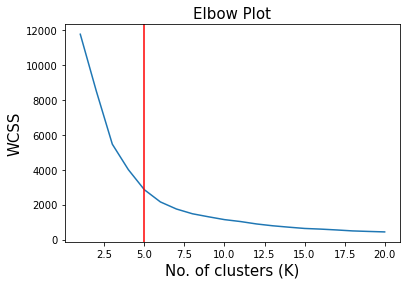

In [63]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# plot a vertical line at the elbow
plt.axvline(x = 5, color = 'red')

# display the plot
plt.show()

In [67]:
from sklearn.metrics import silhouette_score, silhouette_samples
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(df, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.567003558645348)
For 3 clusters the silhouette score is 0.5923165789101865)
For 4 clusters the silhouette score is 0.5952608940223346)
For 5 clusters the silhouette score is 0.6165188189857588)
For 6 clusters the silhouette score is 0.5958371744797909)


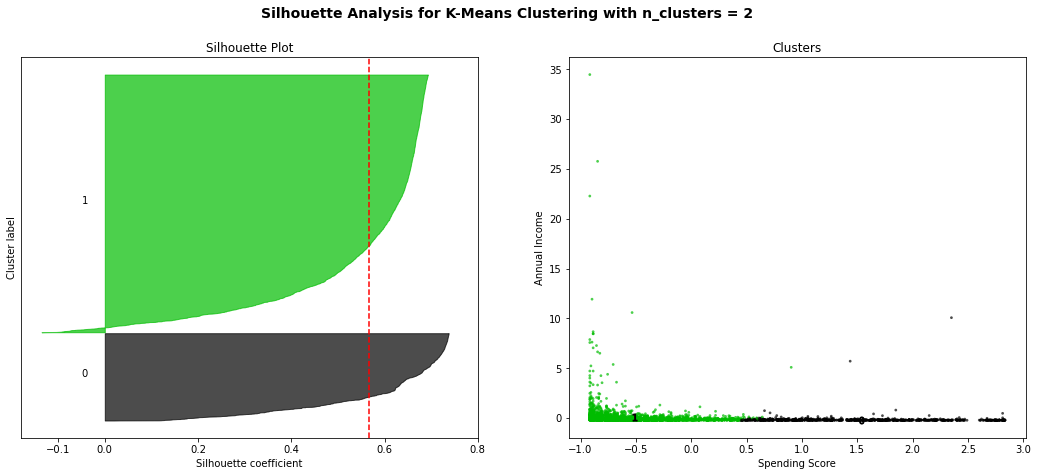

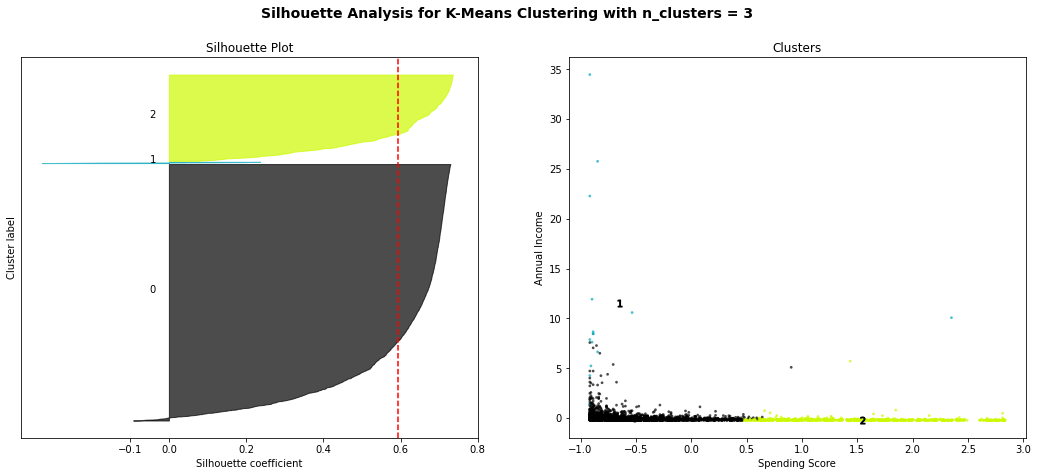

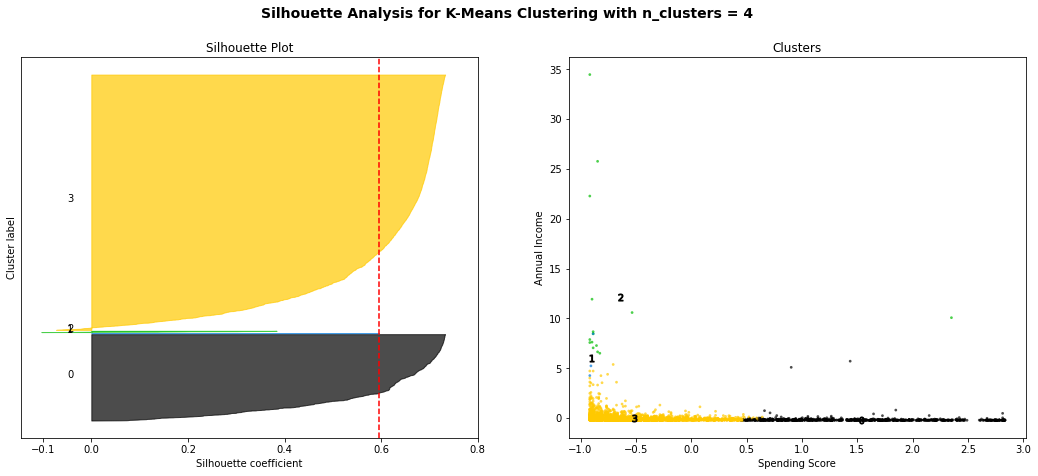

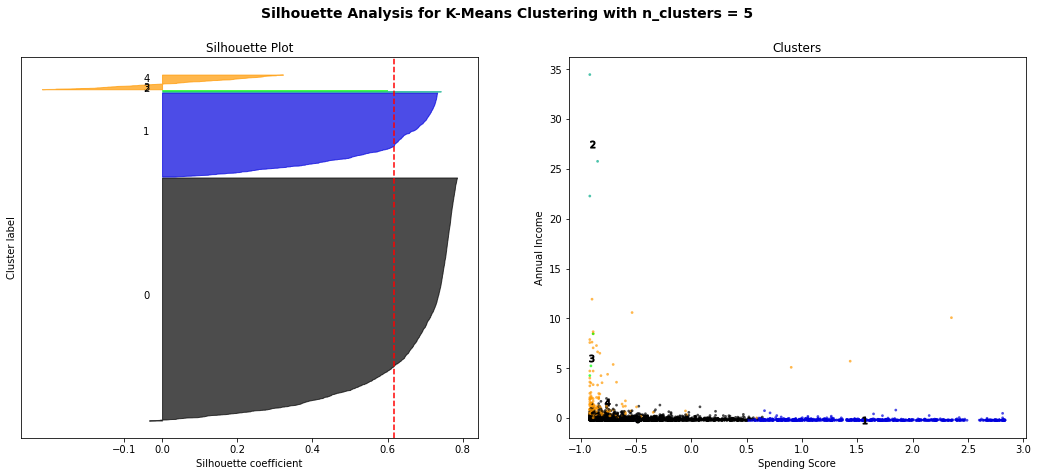

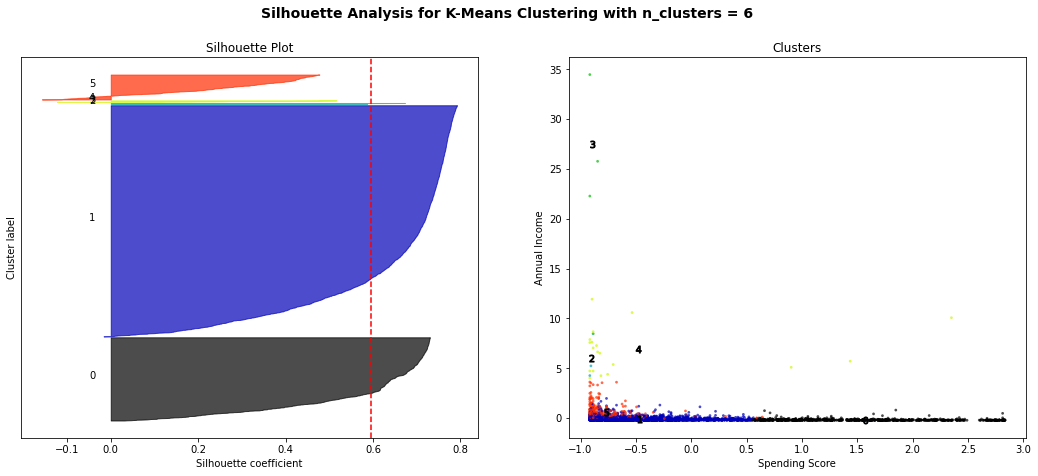

In [68]:
import matplotlib.cm as cm
# consider the number of clusters
n_clusters = [2, 3, 4, 5, 6]

# consider an array of the data
X = np.array(X)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

In [70]:
# build a K-Means model with 5 clusters
new_clusters = KMeans(n_clusters = 5, random_state = 10)

# fit the model
new_clusters.fit(X)

# append the cluster label for each point in the dataframe 'df_cust'
df['Cluster'] = new_clusters.labels_

In [71]:
df

,Recency,Amount,Frequency,Cluster
0,2.349480,10.068174,-0.410395,4
1,-0.906268,0.311738,0.057992,0
2,-0.916317,4.258248,20.690005,3
3,-0.886171,0.297685,0.498828,0
4,-0.896220,-0.123189,-0.144057,0
...,...,...,...,...
3916,1.867147,-0.225012,-0.369067,1
3917,0.892432,-0.238350,-0.382843,1
3918,-0.845977,-0.225353,-0.359883,0
3919,-0.886171,0.030874,3.056591,4


In [72]:
df.Cluster.value_counts()

0    2783
1     963
4     169
3       3
2       3
Name: Cluster, dtype: int64

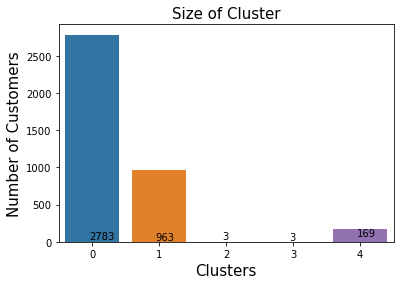

In [74]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.05, y =39, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =37, s = np.unique(new_clusters.labels_, return_counts=True)[1][2])
plt.text(x = 2.95, y =22, s = np.unique(new_clusters.labels_, return_counts=True)[1][3])
plt.text(x = 3.95, y =81, s = np.unique(new_clusters.labels_, return_counts=True)[1][4])

# display the plot
plt.show()

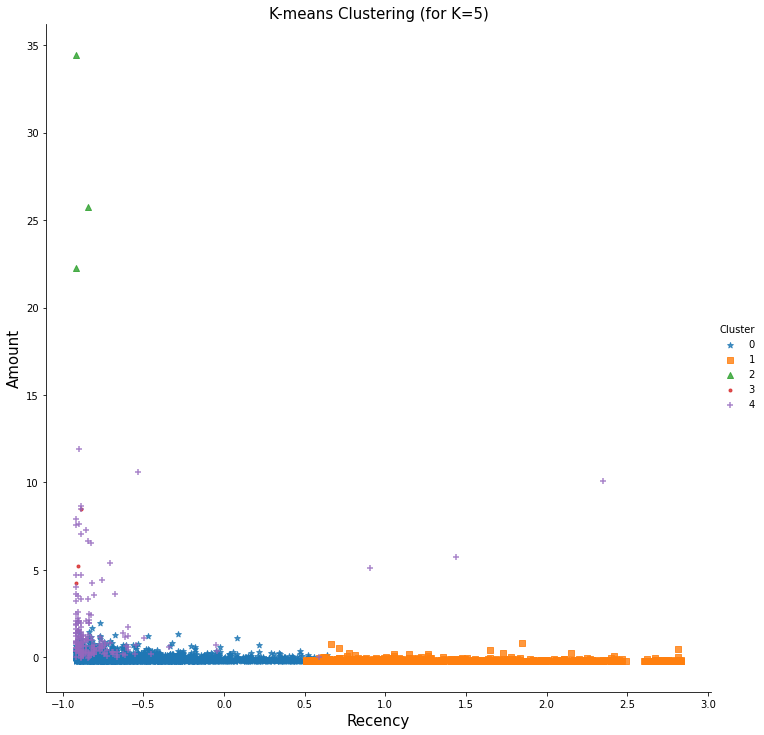

In [77]:
# plot the lmplot to visualize the clusters
# pass the different markers to display the points in each cluster with different shapes
# the 'hue' parameter returns colors for each cluster
sns.lmplot(x = 'Recency', y = 'Amount', data = df, hue = 'Cluster', 
                markers = ['*', ',', '^', '.', '+'], fit_reg = False, size = 10)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=5)', fontsize = 15)
plt.xlabel('Recency', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)

# display the plot
plt.show()

## Hierarchical clustering

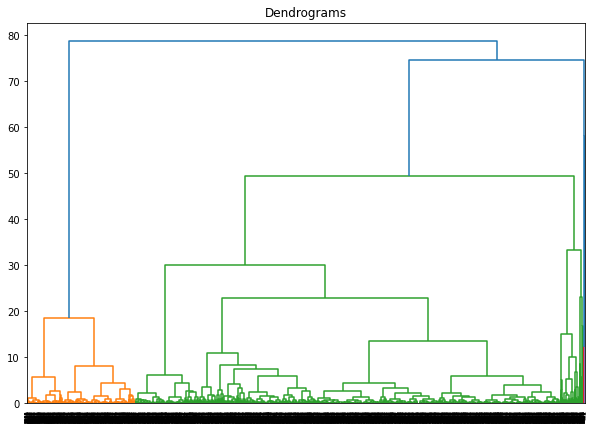

In [79]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [88]:
df1=X
df1

array([[ 2.34947965e+00,  1.00681742e+01, -4.10395112e-01],
       [-9.06268321e-01,  3.11737714e-01,  5.79924468e-02],
       [-9.16316926e-01,  4.25824834e+00,  2.06900052e+01],
       ...,
       [-8.45976692e-01, -2.25353203e-01, -3.59882729e-01],
       [-8.86171112e-01,  3.08743313e-02,  3.05659123e+00],
       [-4.94275522e-01, -3.55971486e-03, -9.35447047e-02]])

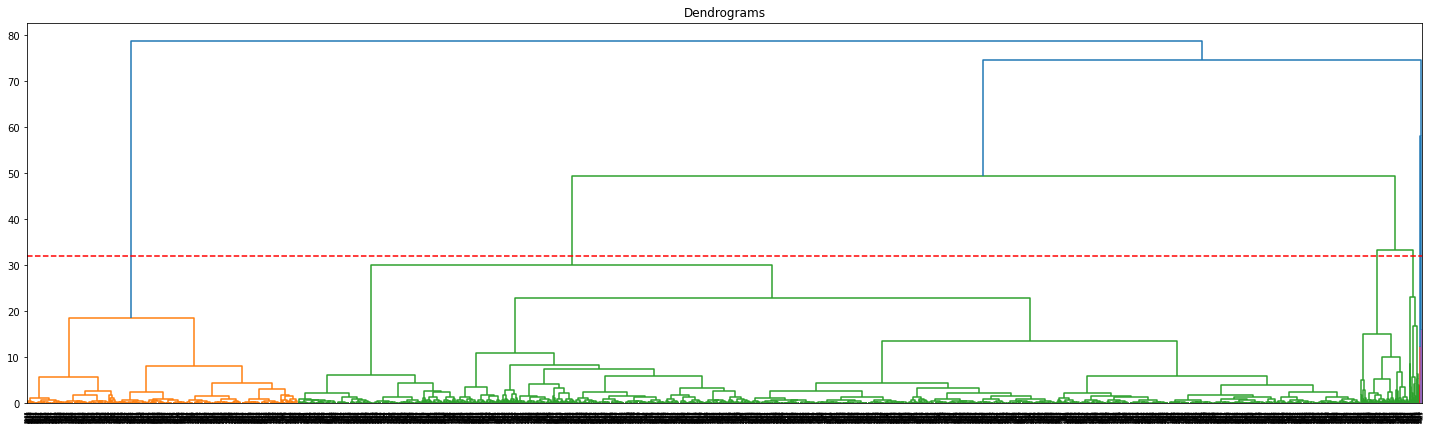

In [83]:
plt.figure(figsize=(25,7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=32, color='r', linestyle='--')

In [89]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit(X)
df['hier_cluster']=cluster.labels_


In [90]:
df

,Recency,Amount,Frequency,Cluster,hier_cluster
0,2.349480,10.068174,-0.410395,4,0
1,-0.906268,0.311738,0.057992,0,1
2,-0.916317,4.258248,20.690005,3,2
3,-0.886171,0.297685,0.498828,0,1
4,-0.896220,-0.123189,-0.144057,0,1
...,...,...,...,...,...
3916,1.867147,-0.225012,-0.369067,1,4
3917,0.892432,-0.238350,-0.382843,1,1
3918,-0.845977,-0.225353,-0.359883,0,1
3919,-0.886171,0.030874,3.056591,4,0


In [93]:
df['hier_cluster'].value_counts()

1    2990
4     760
0     165
2       3
3       3
Name: hier_cluster, dtype: int64

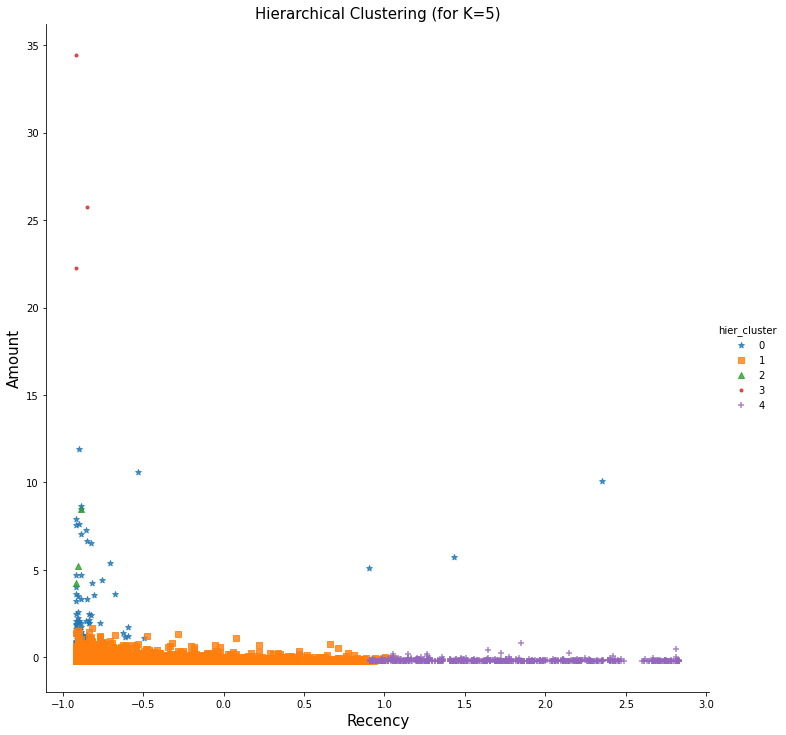

In [92]:
sns.lmplot(x = 'Recency', y = 'Amount', data = df, hue = 'hier_cluster', 
                markers = ['*', ',', '^', '.', '+'], fit_reg = False, size = 10)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering (for K=5)', fontsize = 15)
plt.xlabel('Recency', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)

# display the plot
plt.show()

## Density Based Scan

In [99]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(X)
df['dbscan_cluster']=dbscan.labels_

In [100]:
df

,Recency,Amount,Frequency,Cluster,hier_cluster,dbscan_cluster
0,2.349480,10.068174,-0.410395,4,0,-1
1,-0.906268,0.311738,0.057992,0,1,0
2,-0.916317,4.258248,20.690005,3,2,-1
3,-0.886171,0.297685,0.498828,0,1,0
4,-0.896220,-0.123189,-0.144057,0,1,0
...,...,...,...,...,...,...
3916,1.867147,-0.225012,-0.369067,1,4,0
3917,0.892432,-0.238350,-0.382843,1,1,0
3918,-0.845977,-0.225353,-0.359883,0,1,0
3919,-0.886171,0.030874,3.056591,4,0,0


In [102]:
df['dbscan_cluster'].value_counts()

 0    3868
-1      47
 1       6
Name: dbscan_cluster, dtype: int64

<Figure size 720x720 with 0 Axes>

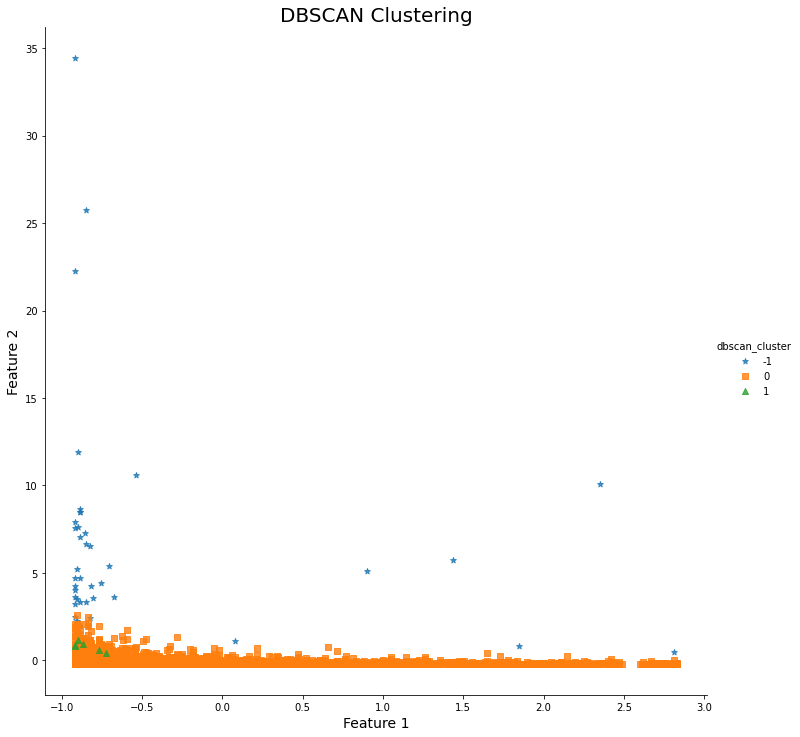

In [112]:
import matplotlib
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
sns.lmplot(x = 'Recency', y = 'Amount', data = df, hue = 'dbscan_cluster', 
                markers = ['*', ',', '^'], fit_reg = False, size = 10)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()